In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [60]:
azulier        = "#1A3D6F"
doradoier     = '#C65C25'

In [2]:
f = '../../data/temixco.csv'
tmx = pd.read_csv(f,index_col=0,parse_dates=True)
tmx

,Ib,Ig,To,RH,WS,WD,P
time,,,,,,,
2018-01-01 00:00:00,NaN,NaN,18.70,36.34,1.422,316.0,87864.11
2018-01-01 00:10:00,0.002,0.0,18.95,35.29,1.008,283.7,87876.37
2018-01-01 00:20:00,0.170,0.0,18.94,35.43,1.565,326.0,87888.64
2018-01-01 00:30:00,0.371,0.0,18.77,35.89,2.175,354.5,87887.21
2018-01-01 00:40:00,0.305,0.0,18.81,36.34,1.902,348.0,87886.91
...,...,...,...,...,...,...,...
2018-12-31 23:10:00,0.125,0.0,18.51,47.29,1.715,332.2,87484.32
2018-12-31 23:20:00,0.000,0.0,18.26,48.02,1.703,320.5,87470.70
2018-12-31 23:30:00,0.044,0.0,18.39,46.84,2.887,335.7,87455.03


In [13]:
dia = tmx[['Ig','To']].groupby(by=[tmx.index.strftime("%H:%M")]).mean()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 00:00 to 23:50
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ig      144 non-null    float64
 1   To      144 non-null    float64
dtypes: float64(2)
memory usage: 3.4+ KB


<AxesSubplot: xlabel='time'>

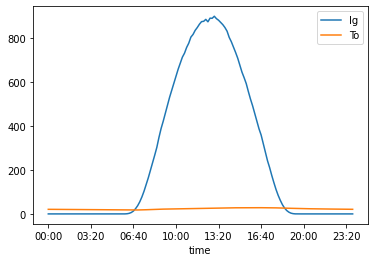

In [14]:
dia.plot()

In [76]:
def formato_ax(axs):
    for ax in axs:
#         ax.legend()
        ax.spines[['right', 'top']].set_visible(False)
#         ax.grid()
        ax.spines['bottom'].set_color('grey')
        ax.spines['left'].set_color('grey')
    

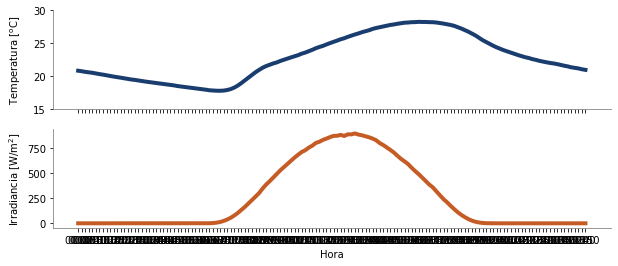

In [81]:
fig, ax = plt.subplots(2,figsize=(10,4),sharex=True)

# hours = mdates.HourLocator(interval = 1)

ax[0].plot(dia.To, label='To',c=azulier,lw=4)
ax[1].plot(dia.Ig, label='Ig',c=doradoier,lw=4)

ax[0].set_ylim(15,30)


ax[0].set_ylabel('Temperatura [$^oC$]', labelpad=10)
ax[1].set_ylabel('Irradiancia [$W/m^2$]')
ax[1].set_xlabel('Hora')

# ax[1].xaxis.set_major_locator(mdates.HourLocator())
# fig.autofmt_xdate()

# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
# ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
formato_ax(ax);

In [36]:
# fig, (ax1,ax2) = plt.subplots(2,figsize=(10,4))

# ax1.plot(dia.To, label='To')
# ax2.plot(dia.Ig, label='Ig')



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

idx = pd.date_range('2017-01-01 05:03', '2017-01-01 18:03', freq = 'min')
df = pd.Series(np.random.randn(len(idx)),  index = idx)

fig, ax = plt.subplots()
h_fmt = mdates.DateFormatter('%H:%M:%S')

ax.plot(df.index, df.values, color = 'black', linewidth = 0.4)
#or use
df.plot(ax = ax, color = 'black', linewidth = 0.4, x_compat=True)
#Then tick and format with matplotlib:
ax.xaxis.set_major_formatter(h_fmt)

fig.autofmt_xdate()
plt.show()
